In [9]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_22c70bf955fd4cebae213e416536e318 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_22c70bf955fd4cebae213e416536e318 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_22c70bf955fd4cebae213e416536e318 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1MyMhnkW8h5Udl5m2IySghFCfaupYijxayJEy1diCYRS',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_22c70bf955fd4cebae213e416536e318)

body = client_22c70bf955fd4cebae213e416536e318.get_object(Bucket='latihanwatsonstudio-donotdelete-pr-cnb4lwychwpcrp',Key='Mall_Customers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# ubah file csv menjadi dataframe
df = pd.read_csv(body)

# tampilkan 3 baris pertama
df.head(3)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
# ubah nama kolom
df = df.rename(columns={
    'Gender': 'gender', 
    'Age': 'age',  
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
})

# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


Text(0, 0.5, 'Inertia')

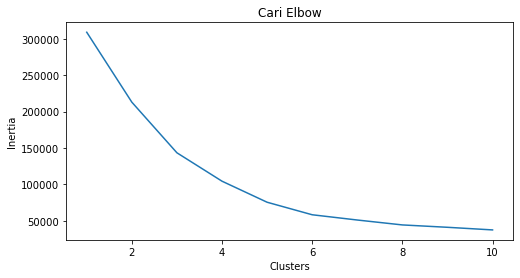

In [10]:
# menghilangkan kolom customer id dan gender
x = df.drop(['CustomerID', 'gender'], axis = 1)

# membuat list yang berisi inersia
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)
    
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

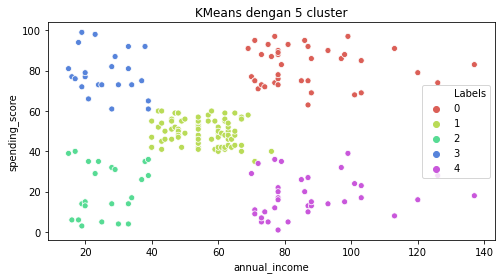

In [16]:
# membuat object KMeans
km5 = KMeans(n_clusters=5).fit(x)

# menambahkan kolom label pada dataset
x['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 kluster
plt.figure(figsize=(8,4))
sns.scatterplot(
    x['annual_income'],
    x['spending_score'], 
    hue=x['Labels'],
    palette=sns.color_palette('hls', 5)
)
plt.title('KMeans dengan 5 cluster')
plt.show()
